In [1]:
import pandas as pd
import numpy as np

In [13]:
path = "OppAdded.xlsx"
datatype = {"season_x": str, 
            "name": str, 
            "position":  str, 
            "team_x":  str, 
            "assists": int, 
            "bonus": int, 
            "bps": int, 
            "clean_sheets": int,
            "creativity": float, 
            "element": int,
            "fixture": int,
            "goals_conceded": int,
            "goals_scored": int,
            "ict_index": float,
            "influence": float,
            "kickoff_time": str,
            "minutes": int,
            "opponent_team": int,
            "opp_team_name": str,
            "own_goal": int,
            "penalties_missed": int,
            "penalties_saved": int,
            "red_cards": int,
            "round": int,
            "saves": int,
            "selected": int,
            "team_a_score": float,
            "team_h_score": float,
            "threat": float,
            "total_points": int,
            "transfers_balance": int,
            "transfers_in": int,
            "transfers_out": int,
            "value": int,
            "was_home": bool,
            "yellow_cards": int, 
            "GW": int,
            "ShortForm": float,
            "OpponentScored": int,
            "OpponentConced": int}

In [3]:
Opponent = pd.read_excel(path, dtype = datatype)

In [4]:
Opponent

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,ShortForm,OpponentScored,OpponentConceded
0,17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,0,0,0,55,False,0,1,0.0,0,0
1,17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,0,0,0,60,True,0,1,0.0,0,0
2,17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,0,0,0,80,True,0,1,0.0,0,0
3,17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,0,0,0,50,False,0,1,0.0,0,0
4,17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,0,0,0,45,True,1,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81770,22,Wilfred Ndidi,MID,Leicester,1,0,10,0,0.9,216,...,1040,2352,1312,48,False,1,14,1.0,6,8
81771,22,Matt Ritchie,DEF,Newcastle,0,0,0,0,0.0,292,...,-2965,174,3139,49,True,0,14,1.4,0,11
81772,22,Nathan Redmond,MID,Southampton,1,0,21,0,33.5,336,...,-1148,1283,2431,59,True,0,14,1.8,8,8
81773,22,Mathew Ryan,GK,Brighton,0,0,0,0,0.0,65,...,-4,0,4,45,False,0,14,0.0,5,7


In [5]:
df = Opponent.copy()

In [6]:
df['AssistRecord'] = 0
df['BonusRecord'] = 0
df['bpsRecord'] = 0
df['CleanSheetRecord'] = 0
df['GoalsConcededRecord'] = 0
df['GoalsScoredRecord'] = 0
df['MinutesRecord'] = 0
df['OwnGoalsRecord'] = 0
df['PenaltiesMissedRecord'] = 0
df['PenaltiesSavedRecord'] = 0
df['RedCardRecord'] = 0
df['SavesRecord'] = 0
df['TransfersInRecord'] = 0
df['TransfersOutRecord'] = 0
df['ValueChange'] = 0
df['YellowCardRecord'] = 0

In [7]:
df['season_x'] = df['season_x'].astype(int)

In [8]:
df['AssistRecord'].unique()

array([0], dtype=int64)

In [9]:
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['AssistRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['assists'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['assists'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1

counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['BonusRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['bonus'].sum()) +
                                            df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['bonus'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['bpsRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['bps'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['bps'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['CleanSheetRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['clean_sheets'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['clean_sheets'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['MinutesRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['minutes'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['minutes'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['OwnGoalsRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['own_goals'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['own_goals'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['PenaltiesSavedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['penalties_saved'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['penalties_saved'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['PenaltiesMissedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['penalties_missed'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['penalties_missed'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['SavesRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['saves'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['saves'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['PenaltiesMissedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['PenaltiesMissedRecord'].sum()) +
                                             df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['PenaltiesMissedRecord'].sum())
        
    
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        
        
        df['TransfersInRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['transfers_in'].sum()) +
                                                 df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['transfers_in'].sum())
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        
        df['TransfersOutRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['transfers_out'].sum()) +
                                                  df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['transfers_out'].sum())
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['ValueChange'].iloc[counter] = (df[(df['name'] == name) & (df['season_x'] == (season)) & (df['GW'] == 1)]['value'].mean() -
                                           df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] == GW)]['value'].mean())
    if counter%1000 == 0:
        print(counter)
    counter += 1
counter = 0
for p in df['name']:
    if df['season_x'].iloc[counter] != 17:
        season = df['season_x'].iloc[counter]
        name = df['name'].iloc[counter]
        GW = df['GW'].iloc[counter]
        
        df['YellowCardRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['yellow_cards'].sum()) +
                                                df[(df['name'] == name) & (df['season_x'] == season) & (df['GW'] < (GW - 11))]['yellow_cards'].sum())
    if counter%1000 == 0:
        print(counter)
    counter += 1

0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AssistRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['assists'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BonusRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['bonus'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bpsRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['bps'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanSheetRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['clean_sheets'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MinutesRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['minutes'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OwnGoalsRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['own_goals'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PenaltiesSavedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['penalties_saved'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PenaltiesMissedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['penalties_missed'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SavesRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['saves'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PenaltiesMissedRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['PenaltiesMissedRecord'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransfersInRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['transfers_in'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransfersOutRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['transfers_out'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ValueChange'].iloc[counter] = (df[(df['name'] == name) & (df['season_x'] == (season)) & (df['GW'] == 1)]['value'].mean() -


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_29576\2818645795.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YellowCardRecord'].iloc[counter] = ((df[(df['name'] == name) & (df['season_x'] == (season - 1)) & (df['GW'] > (GW + 27))]['yellow_cards'].sum()) +


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000


0
1000
2000
3000
4000
5000
6000
7000
8000


C:\Users\bosma_n5t6cpq\AppData\Local\Temp\ipykernel_23528\2412072538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ValueChange'].iloc[counter] = (df[(df['name'] == name) & (df['season_x'] == (season)) & (df['GW'] == 1)]['value'].mean() -


9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000


In [82]:
players = df.groupby(['name']).mean()
players

,season_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,MinutesRecord,OwnGoalsRecord,PenaltiesMissedRecord,PenaltiesSavedRecord,RedCardRecord,SavesRecord,TransfersInRecord,TransfersOutRecord,ValueChange,YellowCardRecord
name,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,20.758621,0.045977,0.080460,2.770115,0.068966,1.918391,260.482759,174.781609,0.448276,0.057471,...,343.505747,0.0,0.0,0.000000,0.0,0.000000,133405.229885,95552.252874,1.961538,0.000000
Aaron Cresswell,19.205882,0.112745,0.215686,12.916667,0.171569,13.503922,421.245098,183.799020,1.117647,0.024510,...,585.563725,0.0,0.0,0.000000,0.0,0.000000,220859.392157,114707.235294,0.436275,0.750000
Aaron Lennon,18.736196,0.036810,0.012270,3.079755,0.067485,2.810429,227.171779,181.687117,0.447853,0.006135,...,273.705521,0.0,0.0,0.000000,0.0,0.000000,17449.165644,15666.693252,1.059211,0.564417
Aaron Mooy,19.500000,0.039474,0.144737,8.710526,0.125000,14.400658,236.750000,189.105263,0.875000,0.059211,...,581.355263,0.0,0.0,0.000000,0.0,0.000000,136353.276316,116607.500000,1.578947,0.532895
Aaron Ramsdale,19.959350,0.008130,0.243902,13.235772,0.130081,0.357724,513.715447,184.951220,1.105691,0.000000,...,681.951220,0.0,0.0,0.146341,0.0,26.707317,97563.406504,124991.219512,1.077922,0.105691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zak Brunt,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,657.000000,295.176471,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,54.117647,31.823529,NaN,0.000000
Zeze Steven Sessegnon,20.101449,0.000000,0.000000,0.000000,0.000000,0.000000,348.797101,204.376812,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,1567.927536,3520.782609,1.789474,0.000000
Álvaro Fernández,22.000000,0.000000,0.153846,8.384615,0.076923,0.000000,556.000000,74.153846,0.769231,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,24.461538,2.923077,NaN,0.000000


In [83]:
import seaborn as sns

<AxesSubplot:xlabel='value', ylabel='total_points'>

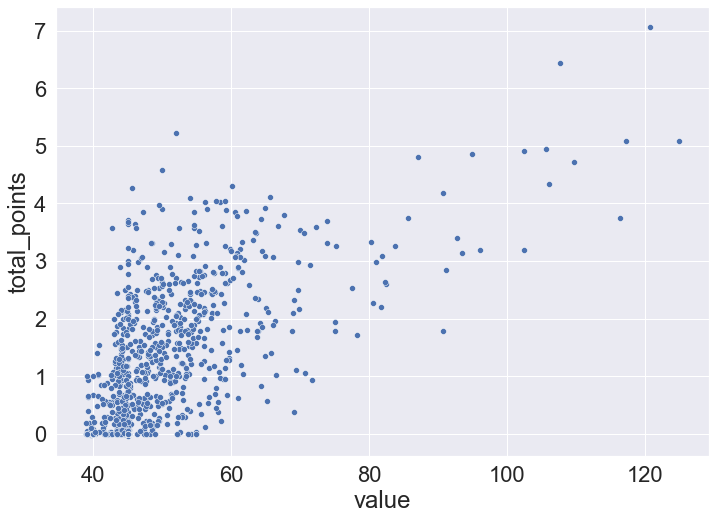

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
sns.scatterplot(data=players, x="value", y="total_points")

In [10]:
df.to_excel('RecordAdded.xlsx', index=False)

In [36]:
forwards = df.drop(df[df.position == 'GK'].index)
forwards = forwards.drop(forwards[forwards.position == 'DEF'].index)
forwards = (forwards[(forwards['season_x'] > 18) & (forwards['minutes'] > 60)])
forwards

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,MinutesRecord,OwnGoalsRecord,PenaltiesMissedRecord,PenaltiesSavedRecord,RedCardRecord,SavesRecord,TransfersInRecord,TransfersOutRecord,ValueChange,YellowCardRecord
18572,19,Aaron Lennon,MID,NaN,0,0,6,1,12.3,83,...,835,0,0,0,0,0,21951,13057,0.0,2
18573,19,Aaron Mooy,MID,NaN,0,0,24,0,18.2,199,...,788,0,0,0,0,0,75127,99837,0.0,2
18576,19,Abdoulaye Doucouré,MID,NaN,0,0,16,1,25.8,390,...,894,0,0,0,0,0,174911,411813,0.0,3
18592,19,Andreas Pereira,MID,NaN,0,0,13,0,5.8,481,...,0,0,0,0,0,0,7,18,0.0,0
18594,19,Andre Gray,FWD,NaN,0,0,8,1,25.2,395,...,233,0,0,0,0,0,8038,18671,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81738,22,Thiago Alcántara do Nascimento,MID,Liverpool,0,0,6,0,2.3,225,...,9,0,0,0,0,0,4229,22701,2.0,0
81756,22,Jadon Sancho,MID,Man Utd,0,0,13,0,28.5,485,...,46,0,0,0,0,0,16332,184002,6.0,0
81758,22,Lukas Rupp,MID,Norwich,0,0,18,0,28.7,317,...,135,0,0,0,0,0,2032,1374,1.0,0
81770,22,Wilfred Ndidi,MID,Leicester,1,0,10,0,0.9,216,...,180,0,0,0,0,0,13258,15401,2.0,0


In [55]:
forwards['OppConcededBin'] = "0-5"
forwards.loc[forwards['OpponentConceded'] > 5, 'OppConcededBin'] = "6-10"
forwards.loc[forwards['OpponentConceded'] > 10, 'OppConcededBin'] = "11-15"
forwards.loc[forwards['OpponentConceded'] > 15, 'OppConcededBin'] = "16-20"
forwards.loc[forwards['OpponentConceded'] > 20, 'OppConcededBin'] = "21+"
forwards.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,PenaltiesMissedRecord,PenaltiesSavedRecord,RedCardRecord,SavesRecord,TransfersInRecord,TransfersOutRecord,ValueChange,YellowCardRecord,bin,OppConcededBin
18572,19,Aaron Lennon,MID,NaN,0,0,6,1,12.3,83,...,0,0,0,0,21951,13057,0.0,2,6-10,6-10
18573,19,Aaron Mooy,MID,NaN,0,0,24,0,18.2,199,...,0,0,0,0,75127,99837,0.0,2,0-5,0-5
18576,19,Abdoulaye Doucouré,MID,NaN,0,0,16,1,25.8,390,...,0,0,0,0,174911,411813,0.0,3,6-10,6-10
18592,19,Andreas Pereira,MID,NaN,0,0,13,0,5.8,481,...,0,0,0,0,7,18,0.0,0,6-10,6-10
18594,19,Andre Gray,FWD,NaN,0,0,8,1,25.2,395,...,0,0,0,0,8038,18671,0.0,0,6-10,6-10


In [85]:
sns.set_theme(style='darkgrid', context='talk')

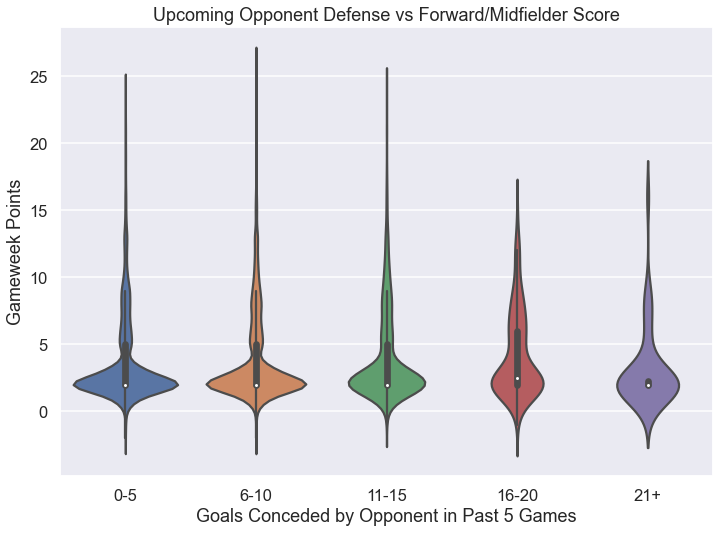

In [73]:
ax = sns.violinplot(x="OppConcededBin",
                    y="total_points",
                    data=forwards, 
                    order = ['0-5', '6-10', '11-15', '16-20', '21+']
                   ).set(title = "Upcoming Opponent Defense vs Forward/Midfielder Score",
                         xlabel='Goals Conceded by Opponent in Past 5 Games',
                         ylabel='Gameweek Points')

In [65]:
DEF = df.drop(df[df.position == 'MID'].index)
DEF = DEF.drop(DEF[DEF.position == 'FWD'].index)
DEF = (DEF[(DEF['season_x'] > 18) & (DEF['minutes'] > 60)])
DEF

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,MinutesRecord,OwnGoalsRecord,PenaltiesMissedRecord,PenaltiesSavedRecord,RedCardRecord,SavesRecord,TransfersInRecord,TransfersOutRecord,ValueChange,YellowCardRecord
18575,19,Aaron Wan-Bissaka,DEF,NaN,1,3,38,1,14.0,145,...,537,0,0,0,0,0,911,543,0.0,1
18586,19,Alex McCarthy,GK,NaN,0,3,34,1,0.0,328,...,900,0,0,0,0,28,64520,11973,0.0,1
18590,19,Alisson Ramses Becker,GK,NaN,0,1,31,1,0.0,468,...,0,0,0,0,0,0,0,0,0.0,0
18593,19,Andrew Robertson,DEF,NaN,1,2,41,1,30.3,247,...,606,0,0,0,0,0,438103,252241,0.0,0
18600,19,Angelo Ogbonna,DEF,NaN,0,0,16,0,13.2,403,...,810,0,0,0,0,0,64379,111559,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81750,22,Kasper Schmeichel,GK,Leicester,0,0,19,0,0.0,200,...,180,0,0,0,0,6,136842,40842,1.0,0
81751,22,Ben White,DEF,Arsenal,0,0,15,0,14.6,67,...,90,0,0,0,0,0,23951,230891,1.0,0
81757,22,Kurt Zouma,DEF,West Ham,0,0,8,0,0.1,128,...,0,0,0,0,0,0,1267,22306,1.0,0
81763,22,Federico Fernández,DEF,Newcastle,1,0,19,0,0.0,465,...,167,0,0,0,0,0,877,1817,2.0,0


In [66]:
DEF = DEF[DEF['OpponentScored'] < 25]

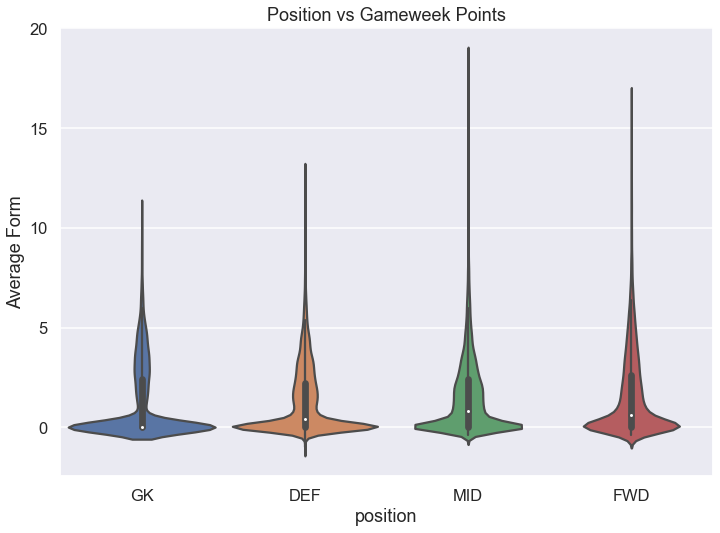

In [78]:
ax = sns.violinplot(x="position", y="ShortForm", data=df, order = ['GK', 'DEF', 'MID', "FWD"], width=0.9).set(title = "Position vs Gameweek Points", ylabel = "Average Form")